<a href="https://colab.research.google.com/github/eedom/DataMining/blob/main/WebScrapinng_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble¶
Title: A Comparison of Water supply in Ethiopian (2015- 2019

Author: Edom Eshete

Email: eeshete@msudenver.edu

Last Update: 2021-09-29

#Introduction
This report presents the preliminary results of an analysis of water supply in Ethiopia between 2915-1029. Data for this report was obtained from The WHO/UNICEF Joint Monitoring Programme for Water Supply, Sanitation and Hygiene (JMP) has reported country, regional and global estimates of progress on drinking water, sanitation and hygiene (WASH) since 1990.

** Dataset**
Data for this report was obtained from The WHO/UNICEF Joint Monitoring Programme[DATA|JMP](https://washdata.org/). Web Scrapig techniques were employed to compile Water supply in Ethiopia between 2015-2019. This Dataset compars differnt  levels of water service provieded to differnt community in Ethiopia. The Data set varies as follow:




* **Basic** If the improved source does  not meet any one of these criteria but a round trip to collect water takes 30 minutes or less.  

*   **limited**  **service:** If water collection from an improved source exceeds 30 minutes 
*   **surface** **wate**r: collected directly from a river, dam, lake, stream or irrigation cana 


*   **unimproved sources** unprotected wells or springs. 
*  **surface**  **water** collected directly from a river, dam, lake, stream or irrigation cana




The script below automatically extracts water supply between 2015-2019. The information is saved in a json file (supply_water.json) with the following structure:











[

    [
        {
            "year": 2015,
            "service_type": "Environmental cleaning",
            "service_level": "Basic service",
            "value": 29.7872,
            "country": "ETH",
            "residence_type": "rural",
            "population": 24200653.533568002
        },
    ]
]

In [ ]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Author(s): Edom Eshete
# Description: Data Collection

from google.colab import drive
from bs4 import BeautifulSoup
from google.colab import drive
import requests
import json

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Content/Colab Notebooks/water_supply/'
FILE_NAME = 'water_supply.json'
BASE_SITE = 'https://api.washdata.org/healthcare/estimates/country?country[]=ETH&residence[]=total&residence[]=rural&residence[]=urban&residence[]=government&residence[]=non_government&residence[]=hospital&residence[]=non_hospital&service_level[]=No%20service&service_level[]=Limited%20service&service_level[]=Basic%20service&service_level[]=Insufficient%20data&service_type[]=Water&service_type[]=Sanitation&service_type[]=Hygiene&service_type[]=Health%20care%20waste&service_type[]=Environmental%20cleaning&year[]=2015&year[]=2016&year[]=2017&year[]=2018&year[]=2019'
HEADERS = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.169 Safari/537.36"}


#Google drive mount
drive.mount('/content/drive')

# data collection
data_col=[]
service_data =[]

response = requests.get(BASE_SITE, headers=HEADERS)
if response.status_code == 200:
    raw_json = response.content.decode('utf-8')
    json_unpacked = json.loads(raw_json)
    #r_json = raw_json[:100]
    #print(r_json)
    
                 

    for items in json_unpacked:
                res = json_unpacked['results']
                data_col.append(res)
             

  

with open(DATA_FOLDER + FILE_NAME, 'wt') as json_file:
  json.dump(data_col, json_file, indent=4)


#print(data_col)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Summary Statistics

In [ ]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Author(s):Edom Eshete
# Description: Summary Statistics 


import json
from google.colab import drive
import numpy as np

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Content/Colab Notebooks/water_supply/'
FILE_NAME = 'water_supply.json'

with open(DATA_FOLDER + FILE_NAME, 'r') as json_file:
  data_col = json.load(json_file)

# service_type == water 
# get all service_level 

coverage = {}

for i in data_col:
    for j in i:
        type_ = j['service_type']
        try:
            coverage[type_] += 1
        except:
            coverage[type_] = 1

print(coverage)

coverage_array = [i for i in coverage.values()]



print('*** Summary Statistics ***')
print(f'#Data_Collecation: {len(coverage)}')
print(f'Coverage range: [{np.min(coverage_array)},{np.max(coverage_array)}]')
print('converage mean: {:.2f}'.format(np.mean(coverage_array)))
print('converage median: {:.2f}'.format(np.median(coverage_array)))
print('Coverage std: {:.2f}'.format(np.std(coverage_array)))



{'Environmental cleaning': 240, 'Hygiene': 300, 'Sanitation': 420, 'Water': 420, 'Health care waste': 300}
*** Summary Statistics ***
#Data_Collecation: 5
Coverage range: [240,420]
converage mean: 336.00
converage median: 300.00
Coverage std: 72.00


# Visualizations

{'Basic service': 405, 'Limited service': 345, 'Insufficient data': 525, 'No service': 405}


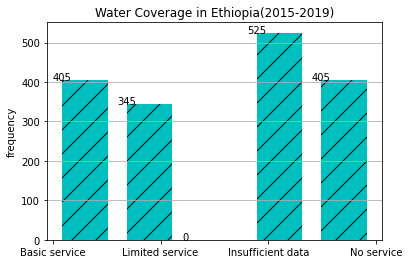

In [ ]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Author(s):Edom Eshete
# Description: histogram

from google.colab import drive
import matplotlib.pyplot as plt 


# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Content/Colab Notebooks/water_supply/'
FILE_NAME = 'water_supply.json'



with open(DATA_FOLDER + FILE_NAME, 'rt') as json_file:
  data_col = json.load(json_file)

coverage = {}

for i in data_col:
    for j in i:
        type_ = j['service_level']
        try:
            coverage[type_] += 1
        except:
            coverage[type_] = 1

print(coverage)
val_1 =[]

mylist = [key for key, val_1 in coverage.items() for _ in range(val_1)]

counts, bins, _ = plt.hist(mylist, 
                           bins=5, 
                           rwidth=0.7,
                           histtype='bar',
                           linewidth=2,
                           facecolor='c',
                           hatch='/', 
                           fill=True
                           )

axes = plt.gca() 
for i in range(len(counts)):
        plt.annotate(str(int(counts[i])), xy=(bins[i], counts[i]))
plt.ylabel('frequency')
plt.title('Water Coverage in Ethiopia(2015-2019)')
plt.grid(axis='y')
plt.show()

{'Environmental cleaning': 240, 'Hygiene': 300, 'Sanitation': 420, 'Water': 420, 'Health care waste': 300}
*** Outliers ***
No outliers


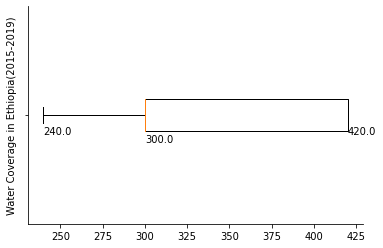

In [ ]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Author(s):Edom Eshete
# Description: box plot

from google.colab import drive
import matplotlib.pyplot as plt 
import json


# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Content/Colab Notebooks/water_supply/'
FILE_NAME = 'water_supply.json'



with open(DATA_FOLDER + FILE_NAME, 'rt') as json_file:
  data_col = json.load(json_file)
  
coverage = {}

for i in data_col:
    for j in i:
        type_ = j['service_type']
        try:
            coverage[type_] += 1
        except:
            coverage[type_] = 1

print(coverage)
outliers = {}
coverage_ = [i for i in coverage.values()]


bp = plt.boxplot(
    coverage_,
    vert=False
)
for median in bp['medians']:
  xy = median.get_xydata()[0]
  xy[1] -= .05
  plt.annotate(str(xy[0]), xy=xy)
    
for cap in bp['caps']:
  xy = cap.get_xydata()[0]
  xy[1] -= .05
  plt.annotate(str(xy[0]), xy=xy)

min_whisker = bp['caps'][0].get_xydata()[0][0]
max_whisker = bp['caps'][1].get_xydata()[0][0]   

 # if items['service_type'] < min_whisker or items['service_type'] > max_whisker:
    
print('*** Outliers ***')
for key in coverage:
  if coverage[key] < min_whisker or coverage[key] > max_whisker:
    outliers[key] = coverage[key]
if len(outliers) == 0:
  print("No outliers")
else:
  for outlier in outliers:
      print(outlier)

# for outlier in outliers:

axes = plt.gca()
axes.set_yticklabels([''])
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
#plt.xlabel('Water coverage in Ethiopia(2015-2019)')
plt.ylabel('Water Coverage in Ethiopia(2015-2019)')
plt.show()